# California Water Conservation Data Analysis 
---

#### Imports 

In [50]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import datetime as dt
import time
import matplotlib.pyplot as plt
import seaborn as sns

# import psutil
from multiprocess import Pool
from tqdm import tqdm
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")

In [51]:
water = pd.read_csv('./cleaned_datasets/water_suppliers.csv')
counties = pd.read_csv('./cleaned_datasets/counties.csv')
hydro_regions = pd.read_csv('./cleaned_datasets/hydrologic_regions.csv')
suppliers = pd.read_csv('./cleaned_datasets/supplier_names.csv')
conserve = pd.read_csv('./cleaned_datasets/conservation.csv')

---
## Water Suppliers
---

In [52]:
hydro_regions['hydrologic_region'].to_dict()

{0: 'San Francisco Bay',
 1: 'Central Coast',
 2: 'South Coast',
 3: 'San Joaquin River',
 4: 'Sacramento River',
 5: 'Colorado River',
 6: 'North Coast',
 7: 'Tulare Lake',
 8: 'South Lahontan',
 9: 'North Lahontan'}

In [53]:
water.head()

,climate_zone,total_population_served,reference_2014_population,reported_final_total_potable_water_production,final_percent_residential_use,reported_final_commercial_industrial_and_institutional_water,calculated_total_potable_water_production_gallons_ag_excluded,calculated_total_potable_water_production_gallons_2013_ag_excluded,calculated_commercial_agricultural_water_gallons,calculated_commercial_agricultural_water_gallons_2013,calculated_r_gpcd,system_id,county_enc,hydro_region_enc,reporting_date
0,3,1400000.0,1379000.0,2.877158e+13,69.734913,6.977072e+12,4.964000e+09,5.418000e+09,0.0,0.0,73.2781,110005,0,0,2021-04-15
1,3,1400000.0,1379000.0,2.877158e+13,69.734913,6.977072e+12,4.221000e+09,4.928000e+09,0.0,0.0,59.3274,110005,0,0,2021-03-15
2,3,1400000.0,1379000.0,2.877158e+13,69.734913,6.977072e+12,3.549000e+09,4.016000e+09,0.0,0.0,55.2268,110005,0,0,2021-02-15
3,3,1400000.0,1379000.0,2.877158e+13,69.734913,6.977072e+12,3.919000e+09,4.099000e+09,0.0,0.0,55.9857,110005,0,0,2021-01-15
4,3,1450000.0,1379000.0,4.169200e+09,60.000000,5.790000e+08,4.169000e+09,4.772000e+09,0.0,0.0,55.6485,110005,0,0,2020-12-15


In [54]:
water.shape

(32425, 15)

In [55]:
water.dtypes

climate_zone                                                            int64
total_population_served                                               float64
reference_2014_population                                             float64
reported_final_total_potable_water_production                         float64
final_percent_residential_use                                         float64
reported_final_commercial_industrial_and_institutional_water          float64
calculated_total_potable_water_production_gallons_ag_excluded         float64
calculated_total_potable_water_production_gallons_2013_ag_excluded    float64
calculated_commercial_agricultural_water_gallons                      float64
calculated_commercial_agricultural_water_gallons_2013                 float64
calculated_r_gpcd                                                     float64
system_id                                                               int64
county_enc                                                      

In [56]:
water['reporting_date'] = pd.to_datetime(water['reporting_date'])
water['reporting_date'].dt.year.value_counts(normalize=True)

2016    0.151149
2015    0.150470
2017    0.149946
2018    0.141804
2020    0.136962
2019    0.134495
2014    0.086847
2021    0.048327
Name: reporting_date, dtype: float64

In [57]:
water['reporting_date'] = pd.to_datetime(water['reporting_date'])
water['reporting_date'].dt.month.value_counts(normalize=True)

9     0.085428
10    0.085305
11    0.085058
1     0.084626
12    0.084595
2     0.084472
7     0.084040
3     0.083948
8     0.083886
6     0.083577
4     0.083331
5     0.071735
Name: reporting_date, dtype: float64

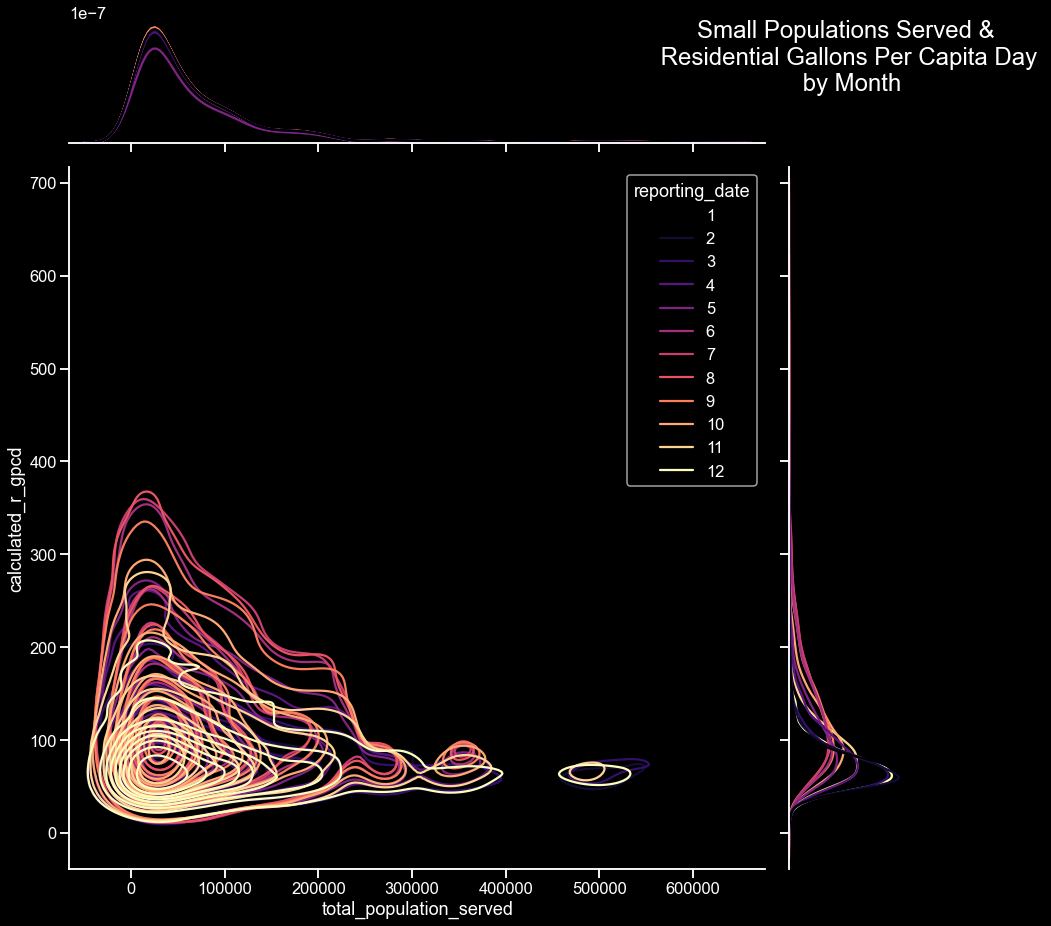

In [58]:
new_table = water[water['total_population_served'] < 700_000]
sns.jointplot(x=new_table['total_population_served'], y=new_table['calculated_r_gpcd'], 
             hue=new_table['reporting_date'].dt.month, palette='magma', height=13, 
             kind='kde')
plt.title('Small Populations Served & \n Residential Gallons Per Capita Day \n by Month',
          fontsize=24, y=1.1);

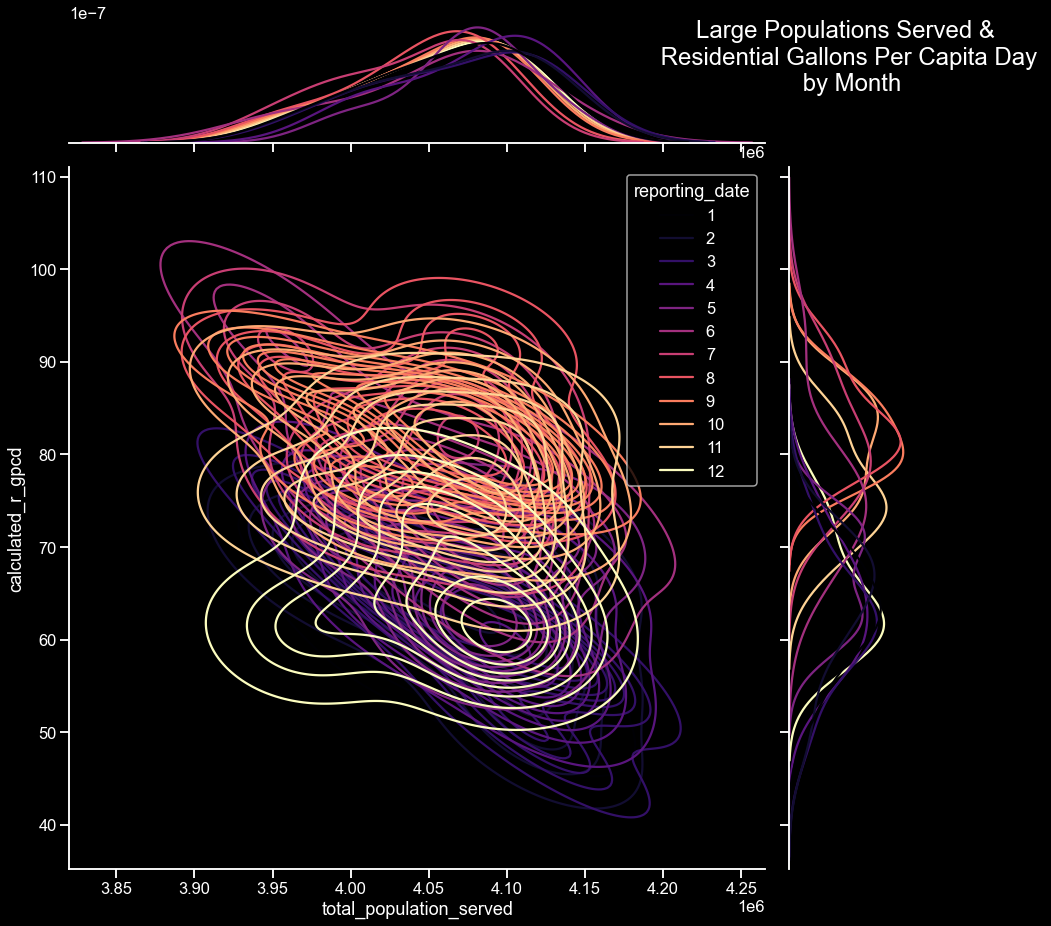

In [68]:
new_table = water[water['total_population_served'] > 2_000_000]
sns.jointplot(x=new_table['total_population_served'], y=new_table['calculated_r_gpcd'], 
             hue=new_table['reporting_date'].dt.month, palette='magma', height=13, 
             kind='kde')
plt.title('Large Populations Served & \n Residential Gallons Per Capita Day \n by Month',
          fontsize=24, y=1.1);

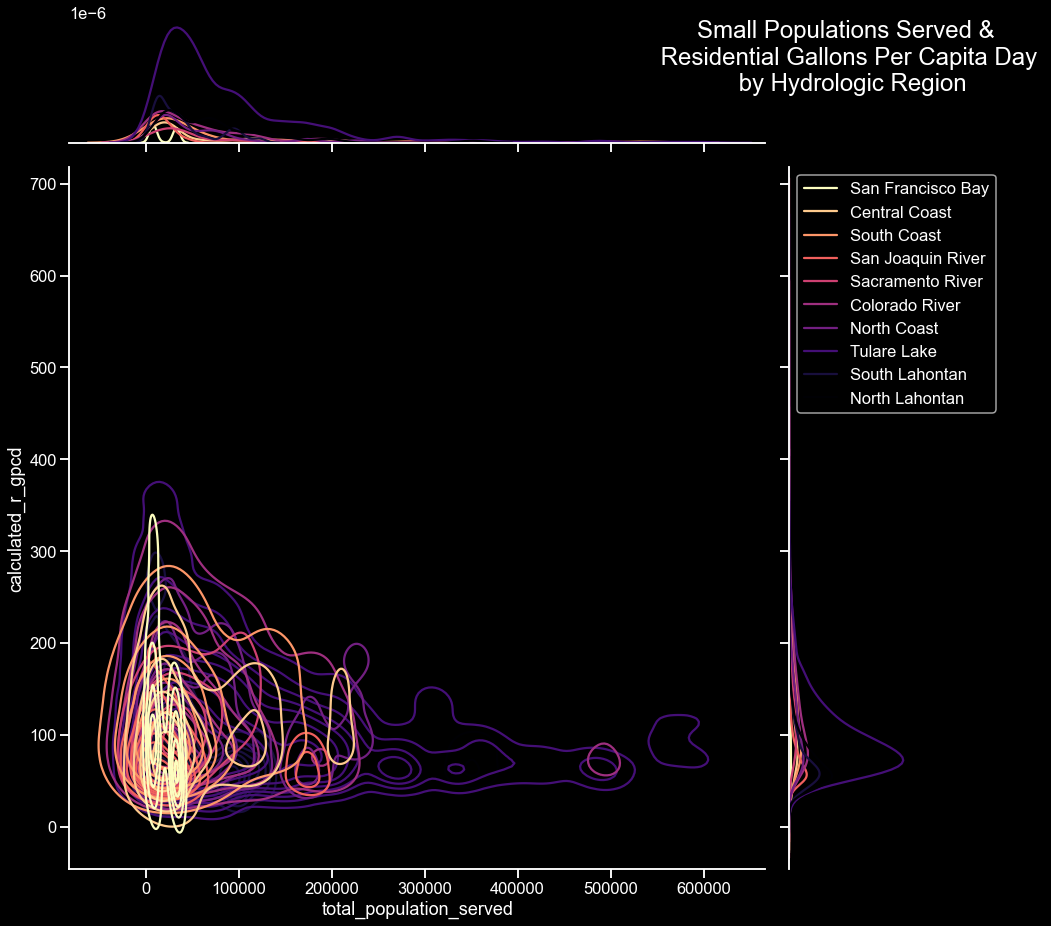

In [60]:
new_table = water[water['total_population_served'] < 700_000]
sns.jointplot(x=new_table['total_population_served'], y=new_table['calculated_r_gpcd'], 
             hue=new_table['hydro_region_enc'], palette='magma', height=13, 
             kind='kde', legend=False)
plt.legend(hydro_regions['hydrologic_region'].to_dict().values())
plt.title('Small Populations Served & \n Residential Gallons Per Capita Day \n by Hydrologic Region',
          fontsize=24, y=1.1);

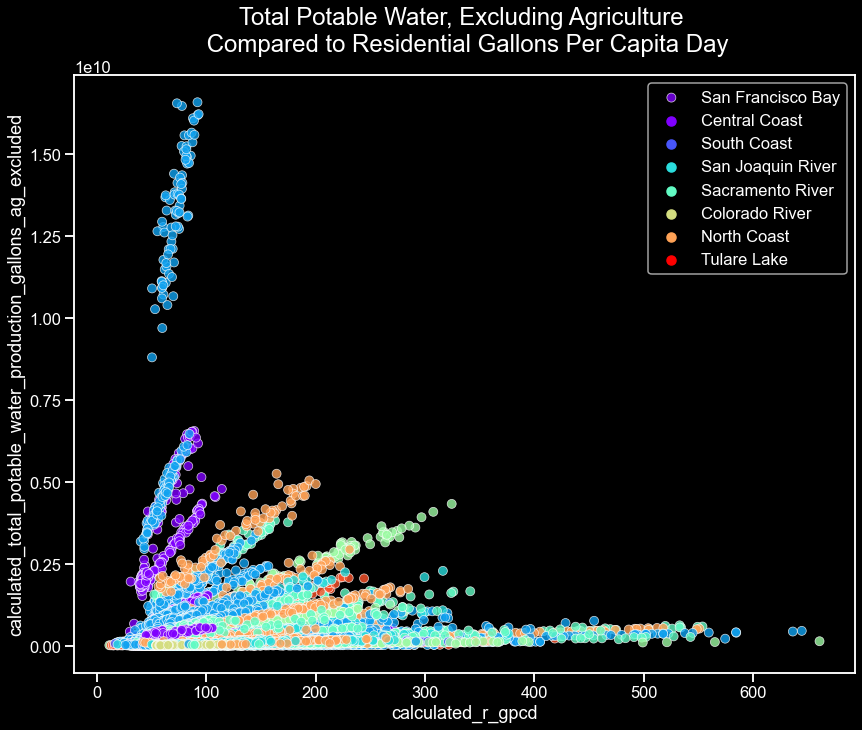

In [61]:
plt.figure(figsize=(14,11))
sns.scatterplot(x='calculated_r_gpcd', y='calculated_total_potable_water_production_gallons_ag_excluded', data=water,
          hue='hydro_region_enc', palette='rainbow', alpha=0.8, legend=True)
plt.legend(hydro_regions['hydrologic_region'].to_dict().values())
plt.title('Total Potable Water, Excluding Agriculture \n Compared to Residential Gallons Per Capita Day', fontsize=24, y=1.03);

In [118]:
water.dtypes

climate_zone                                                                   int64
total_population_served                                                      float64
reference_2014_population                                                    float64
reported_final_total_potable_water_production                                float64
final_percent_residential_use                                                float64
reported_final_commercial_industrial_and_institutional_water                 float64
calculated_total_potable_water_production_gallons_ag_excluded                float64
calculated_total_potable_water_production_gallons_2013_ag_excluded           float64
calculated_commercial_agricultural_water_gallons                             float64
calculated_commercial_agricultural_water_gallons_2013                        float64
calculated_r_gpcd                                                            float64
system_id                                                        

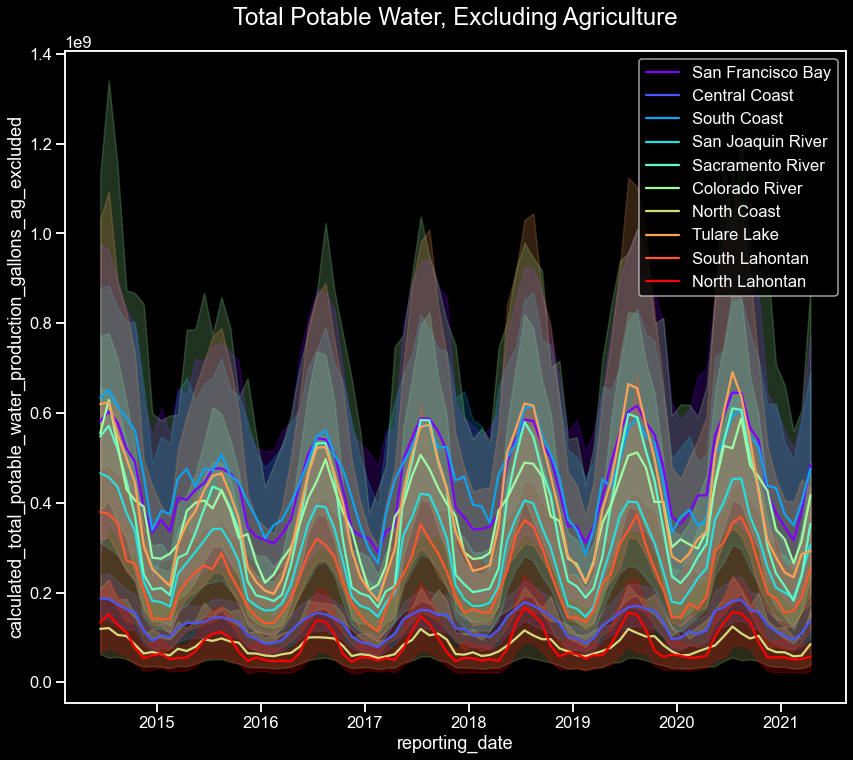

In [62]:
plt.figure(figsize=(14, 12))
sns.lineplot(data=water, x='reporting_date', y='calculated_total_potable_water_production_gallons_ag_excluded',
            hue='hydro_region_enc', palette='rainbow', legend=False)
plt.legend(hydro_regions['hydrologic_region'].to_dict().values())
plt.title('Total Potable Water, Excluding Agriculture', fontsize=24, y=1.03);

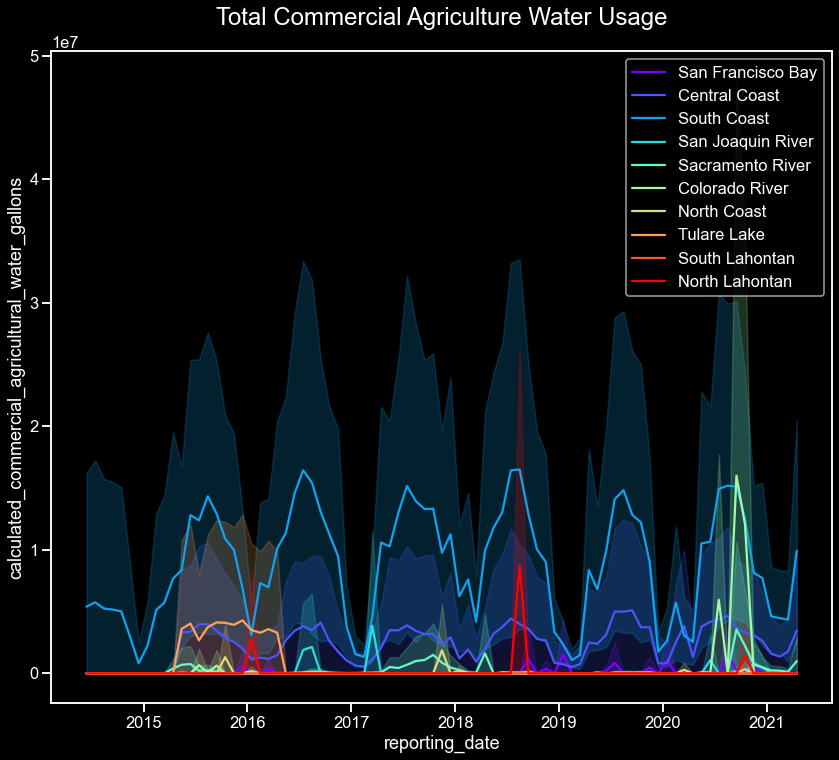

In [63]:
plt.figure(figsize=(14, 12))
sns.lineplot(data=water, x='reporting_date', y='calculated_commercial_agricultural_water_gallons',
            hue='hydro_region_enc', palette='rainbow', legend=False)
plt.legend(hydro_regions['hydrologic_region'].to_dict().values())
plt.title('Total Commercial Agriculture Water Usage', fontsize=24, y=1.03);

In [64]:
water.columns

Index(['climate_zone', 'total_population_served', 'reference_2014_population',
       'reported_final_total_potable_water_production',
       'final_percent_residential_use',
       'reported_final_commercial_industrial_and_institutional_water',
       'calculated_total_potable_water_production_gallons_ag_excluded',
       'calculated_total_potable_water_production_gallons_2013_ag_excluded',
       'calculated_commercial_agricultural_water_gallons',
       'calculated_commercial_agricultural_water_gallons_2013',
       'calculated_r_gpcd', 'system_id', 'county_enc', 'hydro_region_enc',
       'reporting_date'],
      dtype='object')

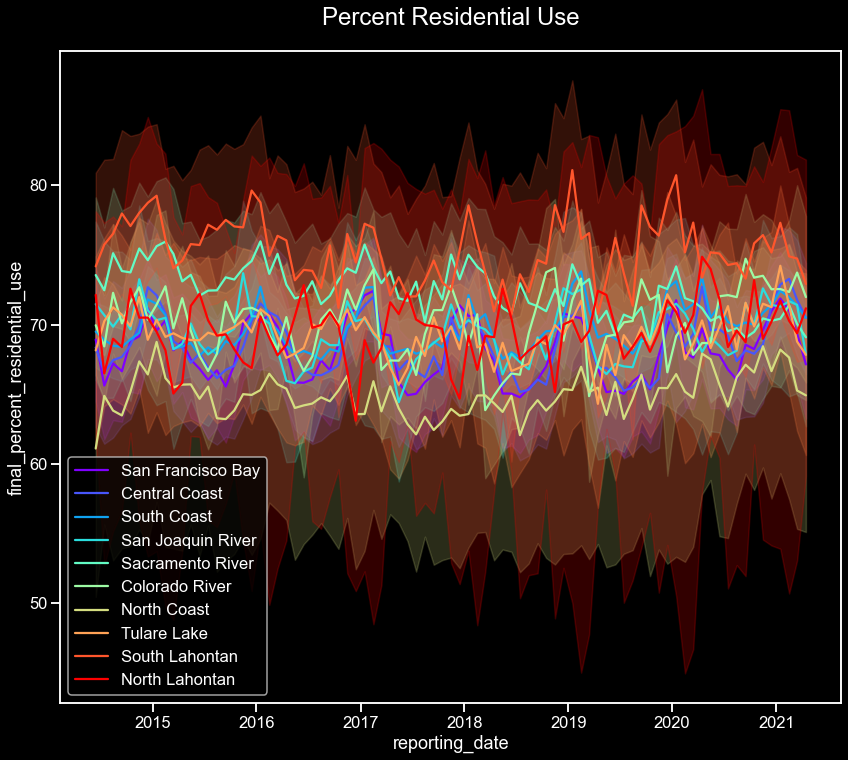

In [65]:
plt.figure(figsize=(14, 12))
sns.lineplot(x=water['reporting_date'] ,y=water['final_percent_residential_use'],
            hue=water['hydro_region_enc'], palette='rainbow', legend=False)
plt.legend(hydro_regions['hydrologic_region'].to_dict().values())
plt.title('Percent Residential Use', fontsize=24, y=1.03);

---
## Water Conservation
---

In [102]:
conserve.head()

,supplier_name,hydrologic_region,prev_conserve_standard,current_conserve_standard,self_cert,pct_enforcable_savings,self_cert_2016,cumulative_savings,missed_standard_by,monthly_savings_aug_2015,monthly_savings_aug_2016,r_gpcd_2016,pop_served
0,California City City of,8,28.0,28.0,0,13.1,18.0,13.1,14.9,16.8,20.5,148.5,14120
1,Yucaipa Valley Water District,2,34.0,20.0,1,18.3,7.1,7.1,12.9,26.4,11.9,260.0,45018
2,Sanger City of,7,26.0,26.0,0,17.3,12.4,17.3,8.7,38.0,17.2,181.1,25664
3,Adelanto City of,8,16.0,16.0,0,9.3,-10.3,9.3,6.7,20.5,-30.6,125.5,29023
4,Red Bluff City of,4,33.0,33.0,0,27.8,19.5,27.8,5.2,42.4,30.8,202.9,14076


In [66]:
conserve.dtypes

supplier_name                 object
hydrologic_region              int64
prev_conserve_standard       float64
current_conserve_standard    float64
self_cert                      int64
pct_enforcable_savings       float64
self_cert_2016               float64
cumulative_savings           float64
missed_standard_by           float64
monthly_savings_aug_2015     float64
monthly_savings_aug_2016     float64
r_gpcd_2016                  float64
pop_served                     int64
dtype: object

<Figure size 1008x864 with 0 Axes>

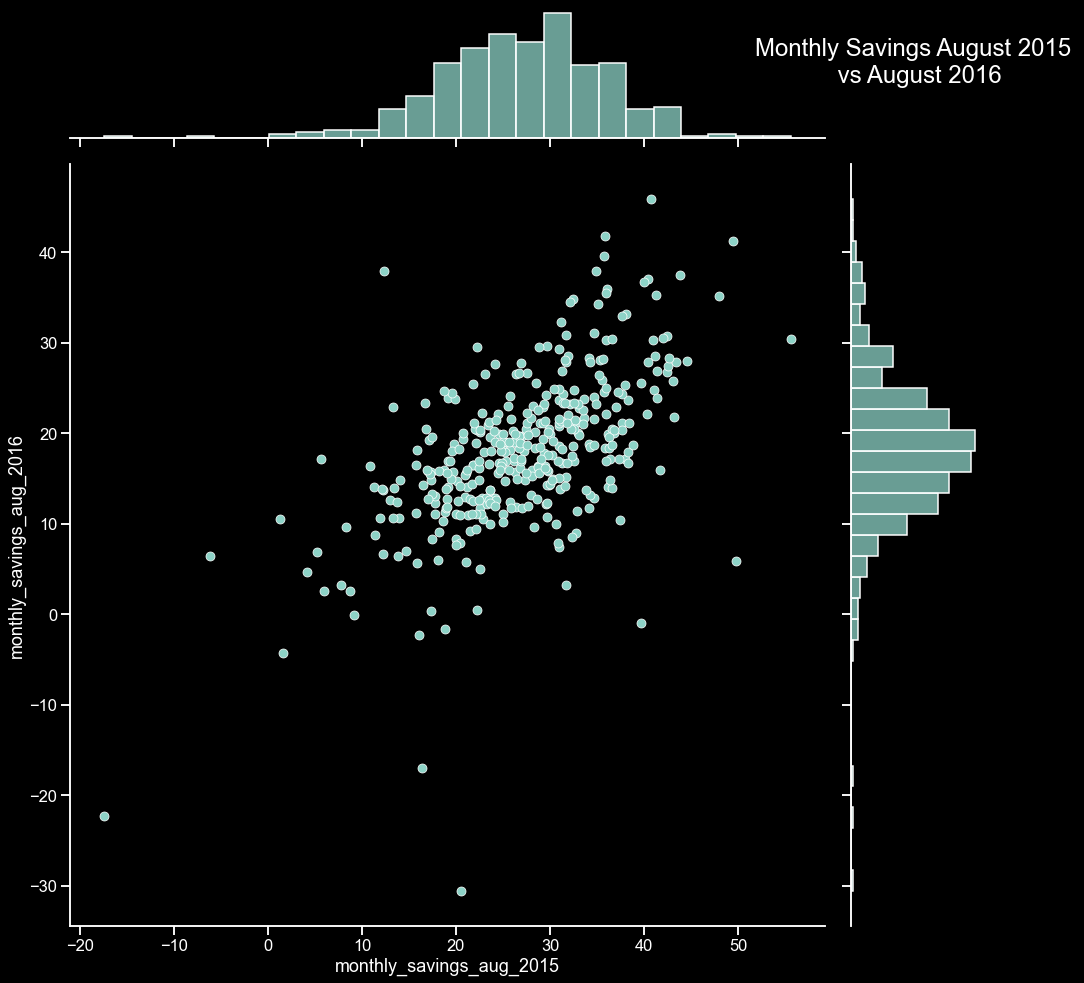

In [74]:
plt.figure(figsize=(14, 12))
sns.jointplot(data=conserve, x='monthly_savings_aug_2015', y='monthly_savings_aug_2016',
              
#               hue='hydrologic_region',
              palette='rainbow', height=14, legend=False)
# plt.legend(hydro_regions['hydrologic_region'].to_dict().values())
plt.title('Monthly Savings August 2015 \n vs August 2016', fontsize=24, y=1.1);

<Figure size 1008x864 with 0 Axes>

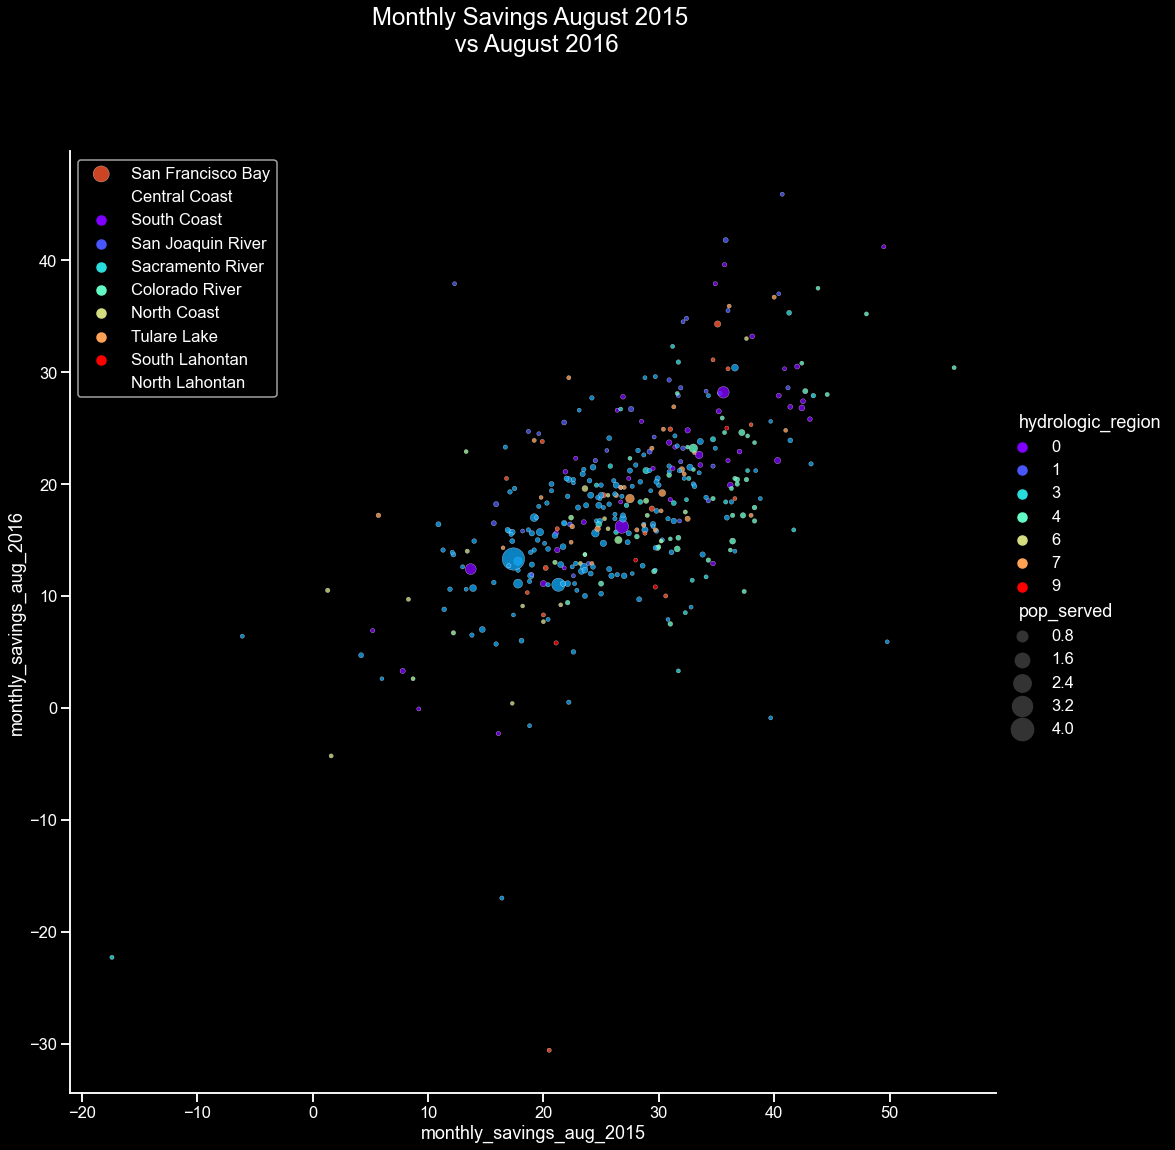

In [109]:
plt.figure(figsize=(14, 12))
sns.relplot(data=conserve, x='monthly_savings_aug_2015', y='monthly_savings_aug_2016',
              hue='hydrologic_region', size='pop_served', sizes=(15, 500),
              palette='rainbow', height=14, alpha=0.8, legend=True)

plt.legend(hydro_regions['hydrologic_region'].to_dict().values(), loc='upper left')
plt.title('Monthly Savings August 2015 \n vs August 2016', fontsize=24, y=1.1);

<Figure size 1008x864 with 0 Axes>

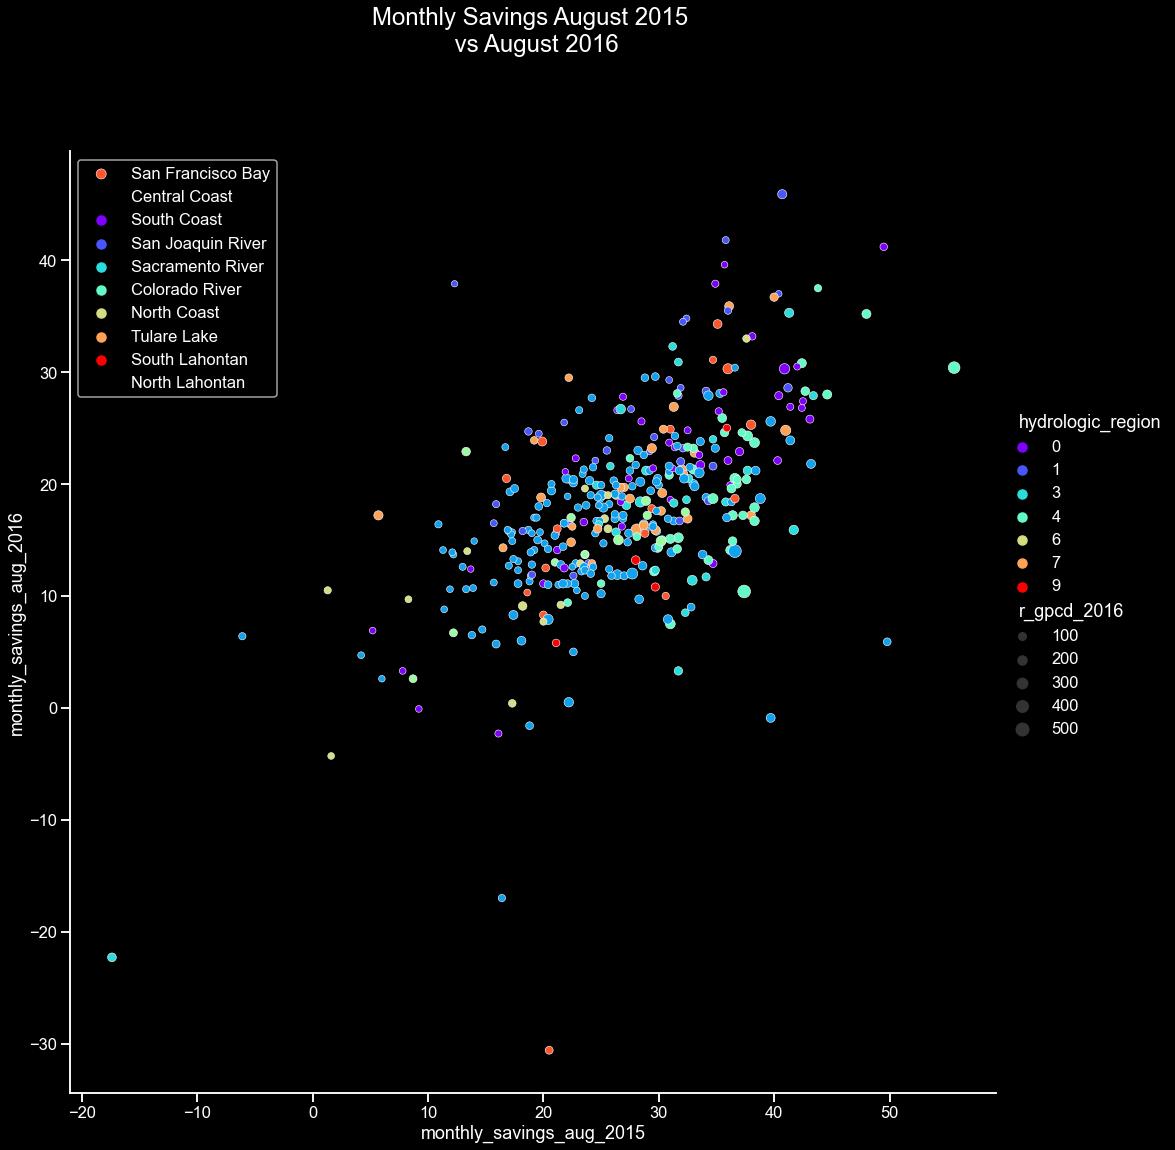

In [100]:
plt.figure(figsize=(14, 12))
sns.relplot(data=conserve, x='monthly_savings_aug_2015', y='monthly_savings_aug_2016',
              
              hue='hydrologic_region', size='r_gpcd_2016',
              palette='rainbow', height=14, legend=True)
plt.legend(hydro_regions['hydrologic_region'].to_dict().values(), loc='upper left')
plt.title('Monthly Savings August 2015 \n vs August 2016', fontsize=24, y=1.1);

In [88]:
len(hydro_regions['hydrologic_region'])

10

<AxesSubplot:xlabel='hydrologic_region', ylabel='cumulative_savings'>

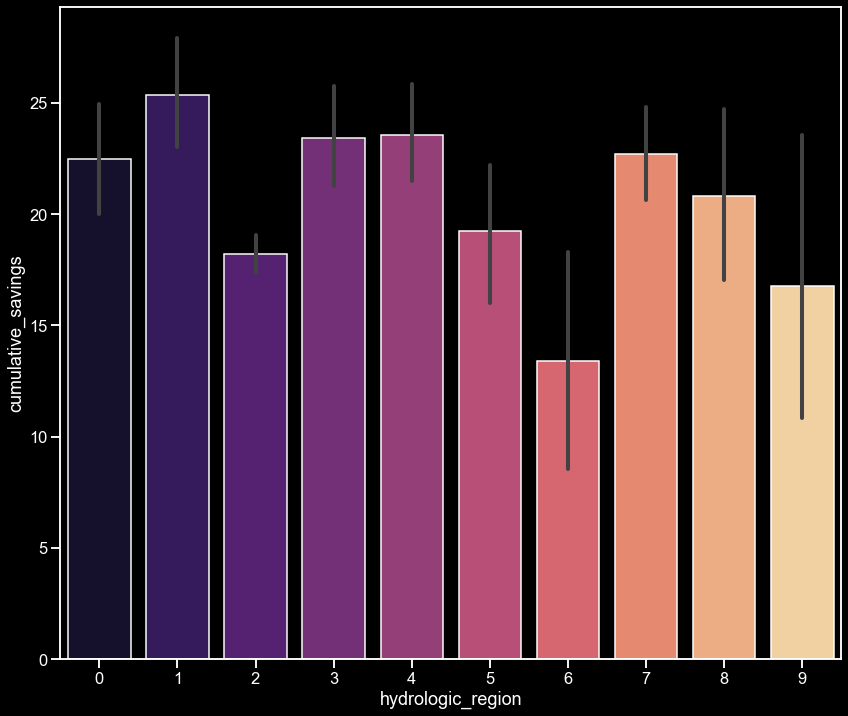

In [90]:
plt.figure(figsize=(14, 12))
sns.barplot(data=conserve, x='hydrologic_region', y='cumulative_savings', palette='magma')
# plt.xticks(ticks=[], labels=hydro_regions['hydrologic_region'].to_dict().values());

In [ ]:
sns.relplot